In [1]:
# Importation des bibliothèques
import	numpy	as	np
import	pandas	as	pd
import sys
np.set_printoptions(threshold=sys.maxsize)
import	warnings
import	matplotlib.pyplot	as	plt
warnings.filterwarnings('ignore')

In [2]:
# Lecture des données brut
df = pd.read_csv("data.csv", sep=';')
# Suppression de 3 lignes contenant des NaN
df = df.dropna()
# Isolation de la colonne "Gender" pour séparer les H et les F
X = df.drop("Target", axis=1).to_numpy()
y = df["Target"].to_numpy()

In [3]:
# Vérification des données
X.shape, y.shape, df.hist

((4424, 36),
 (4424,),
 <bound method hist_frame of       Marital status  Application mode  Application order  Course  \
 0                  1                17                  5     171   
 1                  1                15                  1    9254   
 2                  1                 1                  5    9070   
 3                  1                17                  2    9773   
 4                  2                39                  1    8014   
 ...              ...               ...                ...     ...   
 4419               1                 1                  6    9773   
 4420               1                 1                  2    9773   
 4421               1                 1                  1    9500   
 4422               1                 1                  1    9147   
 4423               1                10                  1    9773   
 
       Daytime/evening attendance  Previous qualification  \
 0                              1             

In [4]:
# Séparation des données pour le train et le test (80% / 20%)
from sklearn.model_selection import train_test_split

# X = variables explicatives (features)
# y = variable à prédire (target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Vérification des données dans le train et dans le test
X_train.shape, X_test.shape

((3539, 36), (885, 36))

In [6]:
# Classification par arbre de décision
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

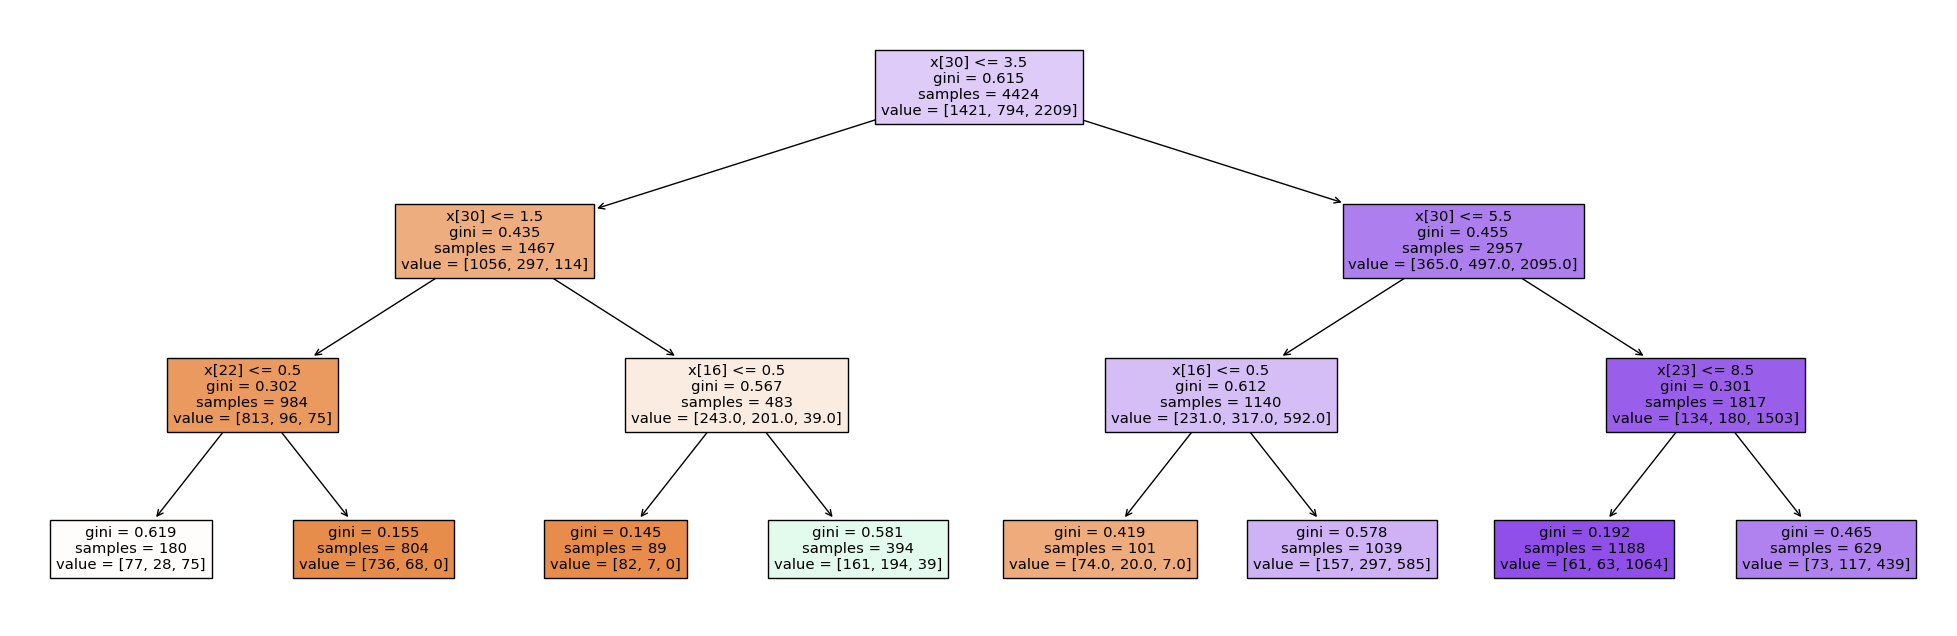

In [7]:
# Création de l'arbre de décision
from sklearn.tree import plot_tree

plt.figure(figsize=(25,8))
plot_tree(tree, filled=True)
plt.show()

In [8]:
# Prédiction + précision
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Prédictions
y_pred = tree.predict(X_test)

# Évaluation
print("Évaluation en moyenne :")
print("Exactitude :", accuracy_score(y_test, y_pred))
print("Précision :", precision_score(y_test, y_pred, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred, average='weighted'))
print("F1 score :", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Évaluation en moyenne :
Exactitude : 0.7152542372881356
Précision : 0.7087187226048305
Rappel : 0.7152542372881356
F1 score : 0.6937468489928436
              precision    recall  f1-score   support

     Dropout       0.85      0.64      0.73       316
    Enrolled       0.44      0.25      0.31       151
    Graduate       0.70      0.94      0.80       418

    accuracy                           0.72       885
   macro avg       0.66      0.61      0.62       885
weighted avg       0.71      0.72      0.69       885



In [9]:
# Create Decision Tree classifer object
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
tree2 = tree2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.7209039548022599


In [10]:
# Create Decision Tree classifer object
tree3 = DecisionTreeClassifier(splitter="random", max_depth=3)

# Train Decision Tree Classifer
tree3 = tree3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6779661016949152


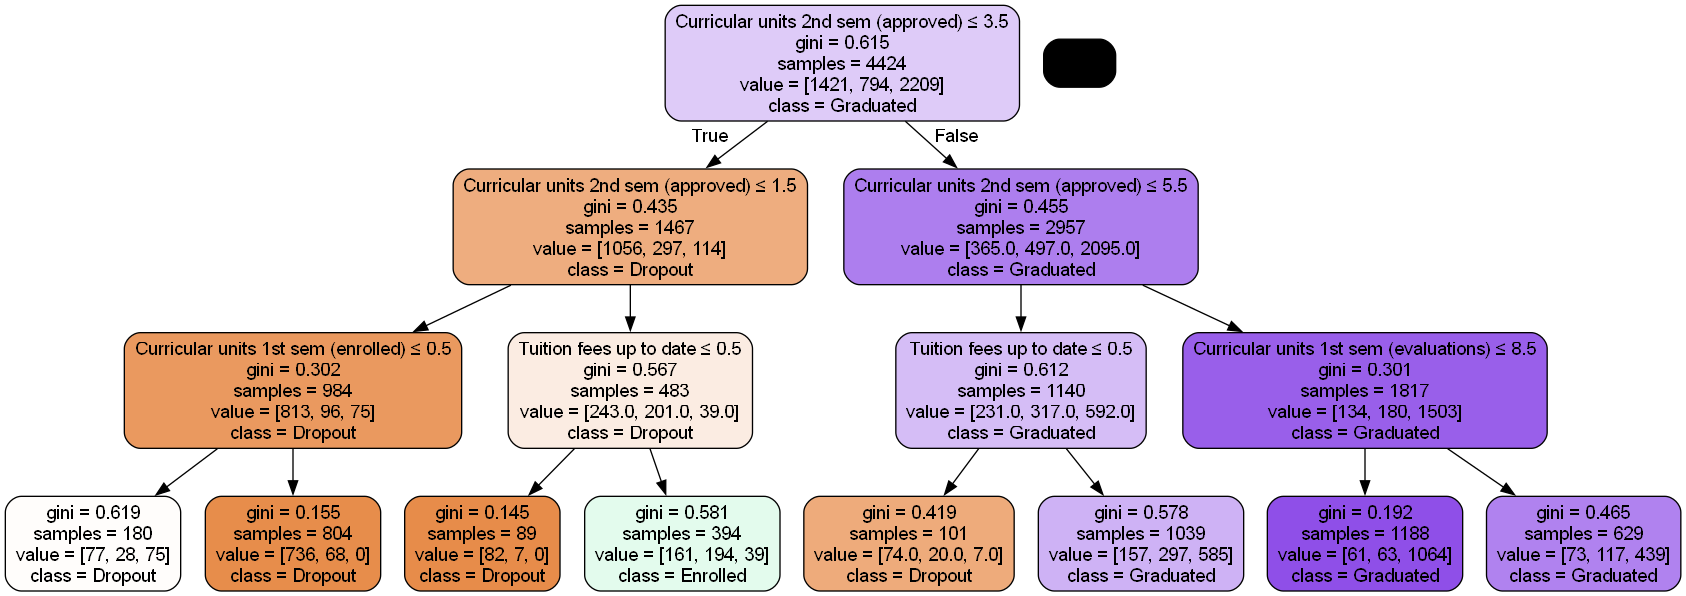

In [11]:
# https://www.datacamp.com/fr/tutorial/decision-tree-classification-python

# First, you need to install GraphViz on your system
# For Ubuntu/Debian: !apt-get install graphviz
# For Windows: Download and install from https://graphviz.org/download/
# For macOS: !brew install graphviz
# Then install pydotplus if not already installed
# !pip install pydotplus

from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import os

# Set the path to GraphViz (adjust this path based on your installation)
# For Windows, it might be something like:
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

feature_columns = df.columns[:-1]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_columns,class_names=['Dropout','Enrolled','Graduated'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('academics.png')
Image(graph.create_png())

In [12]:
# Bibliothèques pour la forêt aléatoire
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Normalisation des variables
df['Target'] = df['Target'].map({'Dropout':0, 'Enrolled':1, 'Graduated':2})

In [13]:
# Classification par forêt aléatoire
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = rf.predict(X_test)

In [15]:
print("Évaluation en moyenne :")
print("Exactitude :", accuracy_score(y_test, y_pred))
print("Précision :", precision_score(y_test, y_pred, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred, average='weighted'))
print("F1 score :", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Évaluation en moyenne :
Exactitude : 0.7694915254237288
Précision : 0.7542798840273843
Rappel : 0.7694915254237288
F1 score : 0.7534351486936375
              precision    recall  f1-score   support

     Dropout       0.85      0.76      0.80       316
    Enrolled       0.51      0.31      0.39       151
    Graduate       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



In [17]:
# Hyperparamètres
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random model classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the model
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028CC6DAA960>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028CC6D9B950>})

In [18]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 404}


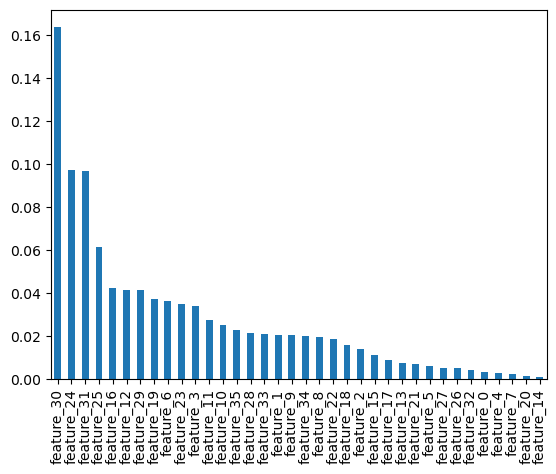

In [19]:
# Create a series containing feature importances from the model and feature names from the training model
# Convert X_train to DataFrame if it's a numpy array, or use column names from elsewhere
if isinstance(X_train, np.ndarray):
    # Generate feature names that match the number of features in your model
    feature_names = [f'feature_{i}' for i in range(len(best_rf.feature_importances_))]
    
    feature_importances = pd.Series(best_rf.feature_importances_, index=feature_names).sort_values(ascending=False)
else:
    # If X_train is already a DataFrame, use its columns
    feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

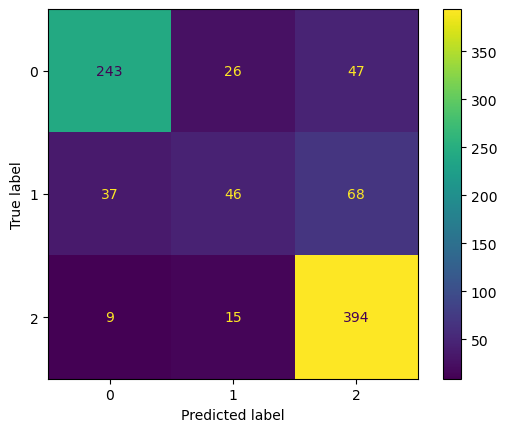

In [20]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [21]:
# Utilisation de la détection d'anomalie d'après la matrice de confusion de la forêt aléatoire
from sklearn.ensemble import IsolationForest

# Suppression de 3 lignes contenant des NaN
df = df.dropna()

model = IsolationForest(contamination=0.01)
model.fit(df)

IsolationForest(contamination=0.01)

In [22]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4412,1,43,1,9070,1,1,125.0,1,19,19,...,2,6,7,5,12.200000,0,13.9,-0.3,0.79,1.0
4413,1,43,1,33,1,1,143.0,1,37,1,...,2,8,10,2,13.000000,0,12.4,0.5,1.79,1.0
4415,4,39,1,9500,1,19,133.1,1,37,37,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,0.0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0.0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0.0


In [23]:
decision = model.decision_function(df)
print(decision)

[ 0.08357109  0.12864984  0.12810037  0.14417862  0.15247298  0.15886533
  0.1804626   0.16923272  0.13930481  0.11235607  0.15906156  0.16255662
  0.12036324  0.15040599  0.09697931  0.12949317  0.12979798  0.06151971
  0.12417028  0.16635272  0.12041331  0.12575681  0.14872185  0.14933514
  0.15455258  0.14521971  0.10440441  0.07057062  0.04165613  0.18337717
  0.14347955  0.10834066  0.11895788  0.14431696  0.14658526  0.08233366
  0.17658086  0.17434123  0.13524727  0.1626024   0.09590778  0.03064812
  0.17356121  0.13561148  0.11858096  0.14844256  0.08380425  0.13728938
  0.10489869  0.14038267  0.12944862  0.06740854  0.10863132  0.16825611
  0.14174333  0.13530053  0.16107089  0.16936548  0.13756738  0.16167105
  0.16930718  0.13237292  0.18928636  0.17197548  0.09001264  0.12861479
  0.14414167  0.14431969  0.13125965  0.11476551  0.1374872   0.07812849
  0.16269834  0.17772352  0.05234141  0.17903857  0.16790734  0.18472994
  0.18133577  0.18260098  0.03287414  0.1771476   0

In [24]:
predict = model.predict(df)
print(predict)

predict_series = pd.Series(predict)
predict_series.value_counts()

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

 1    2192
-1      23
Name: count, dtype: int64

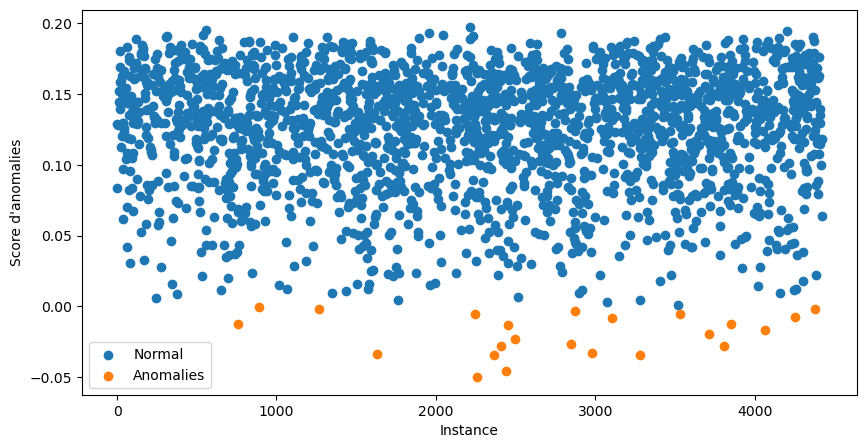

In [25]:
# Visualisation des résultats
plt.figure(figsize=(10, 5))

# Points normaux
normal_index = df.index[predict == 1]
normal_scores = decision[predict == 1]
plt.scatter(normal_index, normal_scores, label='Normal')

# Points anormaux
anomaly_index = df.index[predict == -1]
anomaly_scores = decision[predict == -1]
plt.scatter(anomaly_index, anomaly_scores, label='Anomalies')

plt.xlabel("Instance")
plt.ylabel("Score d'anomalies")
plt.legend()
plt.show()

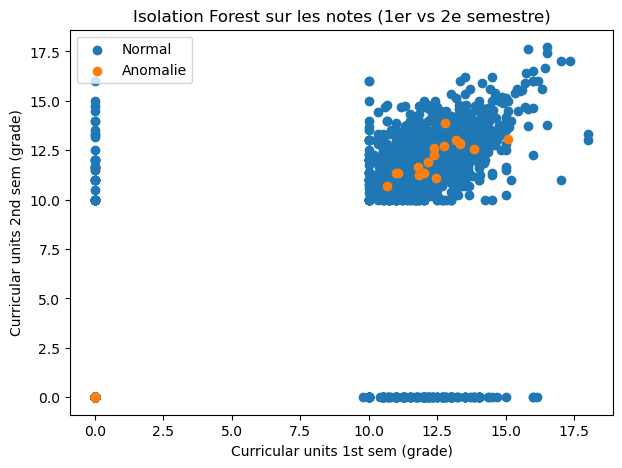

In [34]:
# Comparaison entre les notes du premier et du second semestre en se basant sur les anomalies
col1 = "Curricular units 1st sem (grade)"
col2 = "Curricular units 2nd sem (grade)"

# Séparer les points normaux et anormaux
normal = df[predict == 1]
anomalies = df[predict == -1]

plt.figure(figsize=(7,5))

# Points normaux
plt.scatter(normal[col1], normal[col2], label="Normal")

# Points anormaux
plt.scatter(anomalies[col1], anomalies[col2], label="Anomalie")

plt.xlabel(col1)
plt.ylabel(col2)
plt.title("Isolation Forest sur les notes (1er vs 2e semestre)")
plt.legend()
plt.show()

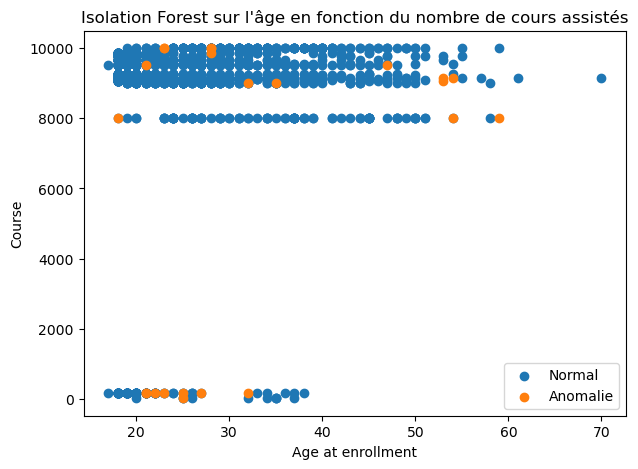

In [39]:
# Comparaison entre l'âge des étudiants et le nombre de cours assistés en se basant sur les anomalies
col1 = "Age at enrollment"
col2 = "Course"

# Séparer les points normaux et anormaux
normal = df[predict == 1]
anomalies = df[predict == -1]

plt.figure(figsize=(7,5))

# Points normaux
plt.scatter(normal[col1], normal[col2], label="Normal")

# Points anormaux
plt.scatter(anomalies[col1], anomalies[col2], label="Anomalie")

plt.xlabel(col1)
plt.ylabel(col2)
plt.title("Isolation Forest sur l'âge en fonction du nombre de cours assistés")
plt.legend()
plt.show()